In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def AbpTo3Channel(abp_data):
    """ Preprocess the 10-second ABP waveform data into 3-channel data: origin data, slope and FFT data.
    
    Parameters
    ----------
    adp_data : ndarray, shape(1000,)
        The data of ABP (Arterial Blood Pressure) waveform
    
    Returns
    -------
    data : ndarray, shape(1000, 1, 3)
        3-channel data: origin data, slope, FFT
        
    Examples
    --------
    >>> print(abp_data.shape)
    (1000, )
    
    >>> svv_data = AbpTo3Channel(abp_data) # output: (1000, 1, 3)
    >>> print(svv_data.shape)
    (1000, 1, 3)

    """
    
    abp_fft = np.fft.fft(abp_data, 1000)
    abp_fft[0] = 0
    abp_data = np.fft.ifft(abp_fft)

    tmp_data = []

    for k in range(10):
        tmp_fft = np.abs(np.fft.fft(abp_data[k:k + 100], 100))
        tmp_fft[0] = 0
        tmp_fft = np.fft.fftshift(tmp_fft)
        tmp_data.append(tmp_fft)

    tmp_dpdt = np.diff(abp_data.flatten(),1)
    tmp_dpdt = np.append(tmp_dpdt, 0)
    tmp_dpdt.flatten()

    tmp_data = np.array(tmp_data)
    fft_data = tmp_data.flatten()

    zfft = np.abs(np.fft.fft(abp_data, 4096))
    zfft[0] = 0
    zfft = np.fft.fftshift(zfft)
    zfft = zfft[len(zfft)//2-500:len(zfft)//2+500]    

    fft_data = np.array(fft_data)
    fft_data = np.reshape(fft_data, [1000, 1])

    zfft_data = np.array(zfft)
    zfft_data = np.reshape(zfft_data, [1000, 1])

    dpdt = np.array(tmp_dpdt)
    dpdt = np.reshape(dpdt, [1000, 1])

    data = np.array(abp_data)
    data = np.reshape(data, [1000, 1])

    data = np.dstack([data, dpdt, zfft_data])
    
    return data

In [35]:
data = np.load('./test_data/data_0.npy')
abp_data = data[:1]

test_ABP = np.array(abp_data)
test_ABP = test_ABP.squeeze()
print(type(test_ABP))
print(test_ABP.shape) # input: (1000, )
test_ABP = AbpTo3Channel(test_ABP) # output: (1000, 1, 3)
print(type(test_ABP))
print(test_ABP.shape)

<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>
(1000, 1, 3)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


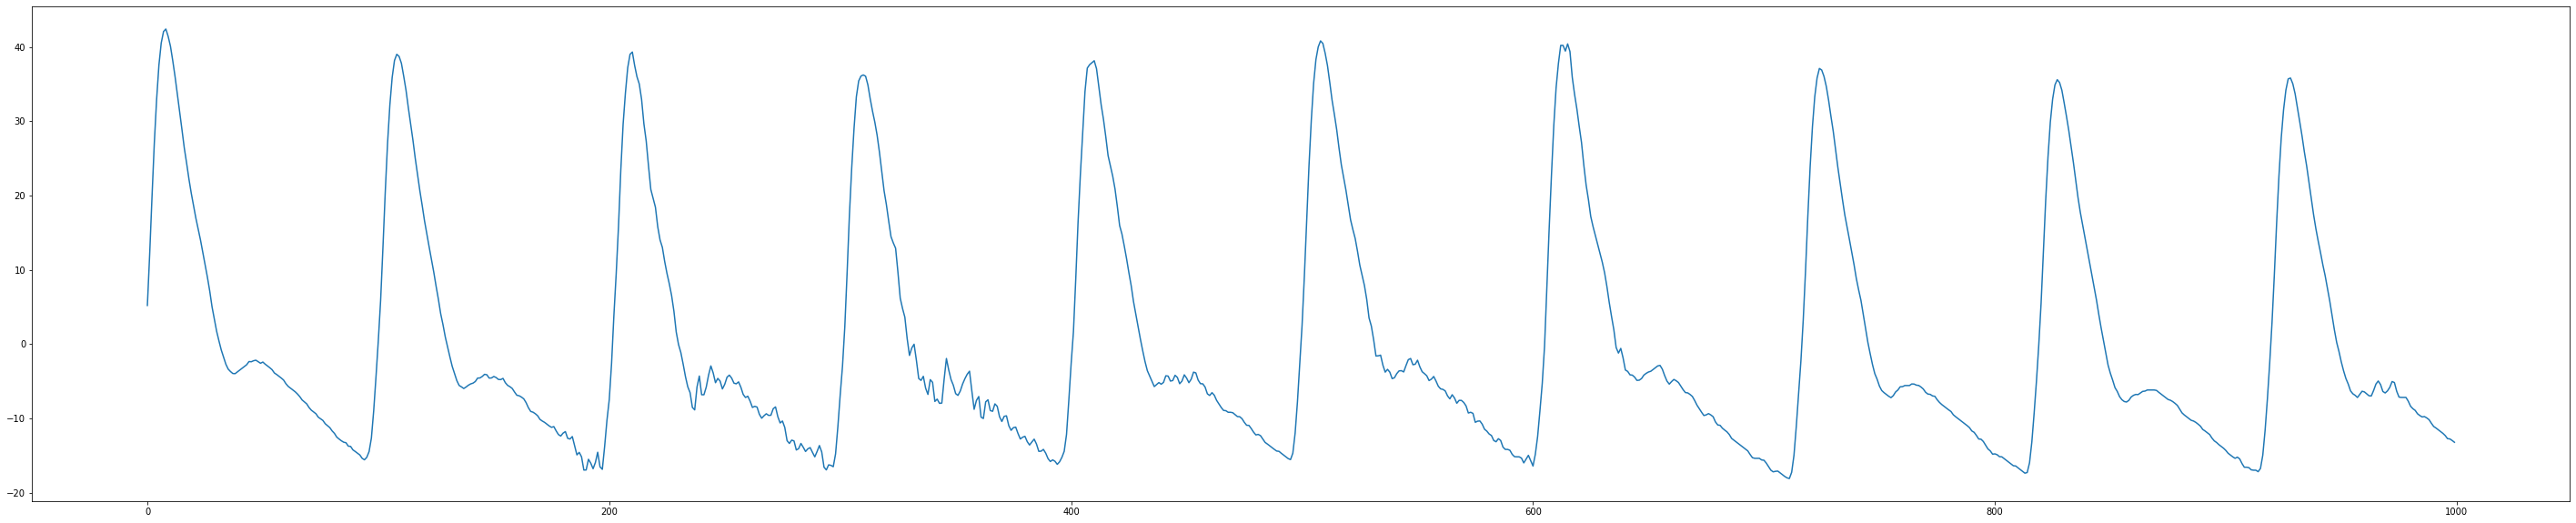

In [37]:
plt.figure(figsize=(50,10))
t = np.arange(1000)
plt.plot(t, test_ABP[:,:,0])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


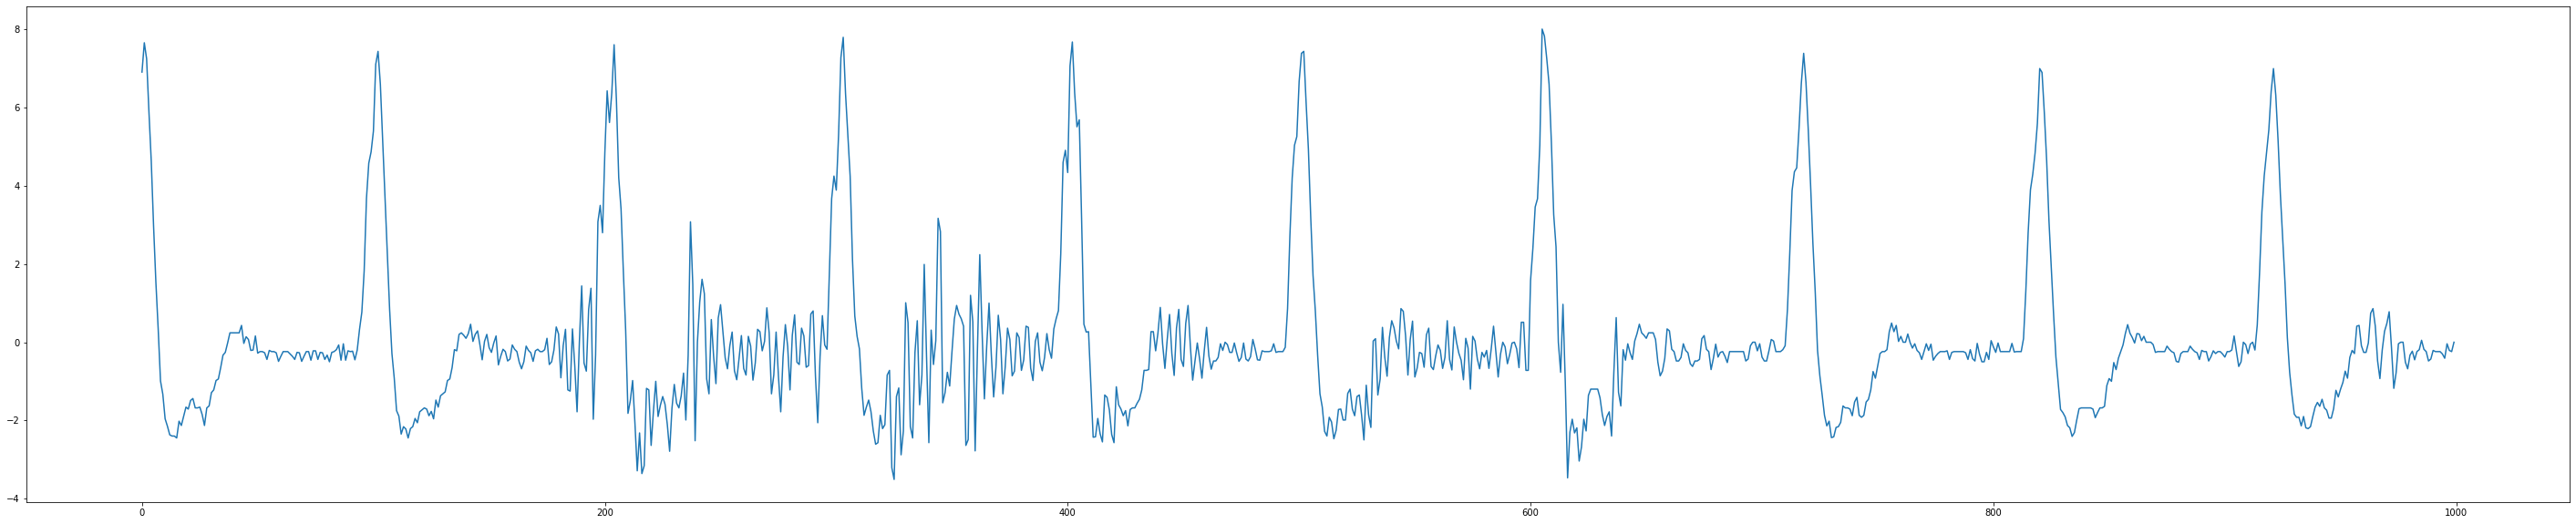

In [31]:
plt.figure(figsize=(50,10))
plt.plot(t, test_ABP[:,:,1])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


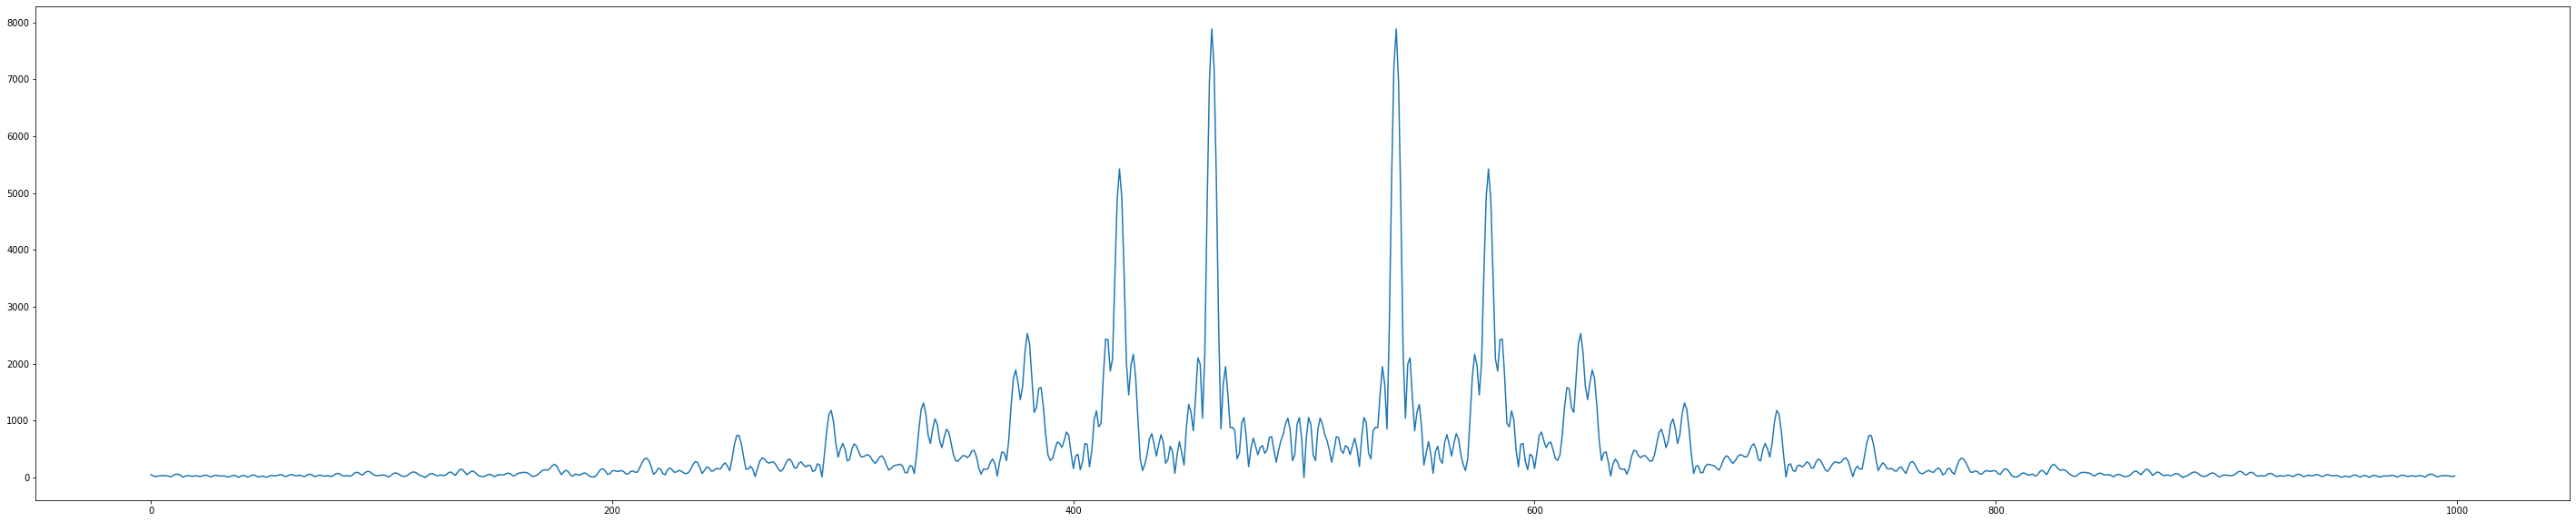

In [32]:
plt.figure(figsize=(50,10))
plt.plot(t, test_ABP[:,:,2])